In [1]:
from DMG import DMG
from Identifiability import HTC_identifiable, EID_identifiable, EID_TSID_identifiable
from Algebraic_equivalence import model_contained, algebraic_equivalence
from helpers import vizualize_graph, id_to_edges, graph_to_id, permutate_graph
from testing import compare_graphs, plot_grid

from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

np.random.seed(1)
np.set_printoptions(precision=3, suppress=True)

In [2]:
# Two algebraically equivalent graphs
nodes = ["a", "b", "c", "d", "e"]
omitted_nodes = ["o1", "o2", "o3", "o4"]
edges = [("o1", "a"), ("o1", "c"), ("o2", "b"), ("o2", "c"), ("o3", "c"), ("o3", "e"), ("o4", "b"), ("o4", "d"), ("a", "d"), ("c", "d"), ("b", "e"), ("b", "a"), ("e", "a")]
graph_a = DMG(nodes, edges, omitted_nodes)

nodes = ["a", "b", "c", "d", "e"]
omitted_nodes = ["o1", "o2", "o3", "o4", "o5"]
edges = [("o1", "a"), ("o1", "c"), ("o2", "b"), ("o2", "c"), ("o3", "c"), ("o3", "e"), ("o4", "b"), ("o4", "d"), ("o5", "a"), ("o5", "e"), ("a", "d"), ("c", "d"), ("b", "e"), ("b", "a")]
graph_b = DMG(nodes, edges, omitted_nodes)

algebraic_equivalence(graph_a, graph_b, method="EID_TSID")

True

In [3]:
# Spurious component using HTC-method:
nodes = ["a", "b", "c", "d", "e"]
omitted_nodes = ["o1", "o2"]
edges = [("o1", "c"), ("o1", "d"), ("o2", "c"), ("o2", "e"), ("a", "b"), ("a", "c"), ("b", "c"), ("c", "d"), ("c", "e"), ("d", "e")]
graph1 = DMG(nodes, edges, omitted_nodes, prime=9973)

nodes = ["a", "b", "c", "d", "e"]
omitted_nodes = ["o1", "o2"]
edges = [("o1", "c"), ("o1", "d"), ("o2", "e"), ("o2", "b"), ("a", "b"), ("a", "e"), ("d", "e"), ("d", "b"), ("c", "e"), ("c", "b")]
graph2 = DMG(nodes, edges, omitted_nodes, prime=9973)

graph1.HTC_identifiable, graph1.HTC_order = HTC_identifiable(graph1)

a, b, c, d, e = graph1.variables
graph1.HTC_order = [[a, []], [b, [a]], [c, [b, a]], [d, [a]], [e, [a, d]]]

model_contained(graph2, graph1, method="HTC")

'INC'

In [9]:
nodes = ["a", "b", "c", "d", "e"]
database = [
    [45, 15], [107, 15], [1099, 15], [1182, 58], [1197, 58], [45, 79], 
    [1114, 85], [1182, 86], [1146, 92], [60, 113], [300, 113], [360, 113], 
    [364, 113], [376, 113], [484, 113], [1114, 113], [4456, 113], [5288, 113], 
    [360, 115], [360, 117], [60, 121], [300, 121], [4746, 172], [4747, 172], 
    [6275, 172], [6307, 172], [4746, 188], [6275, 188], [1452, 195], [5832, 195], 
    [364, 209], [364, 217], [5064, 226], [5304, 226], [5544, 226], [45, 271], 
    [333, 278], [453, 278], [461, 278], [845, 284], [492, 291], [5320, 291], 
    [5352, 291], [5832, 291], [45, 303], [1452, 305], [5288, 305], [5544, 305], 
    [5513, 308], [13704, 308], [5288, 309], [1114, 341], [333, 342], [453, 342], 
    [860, 354], [5240, 354], [5480, 354], [60, 369], [300, 369], [360, 369], 
    [60, 373], [300, 373], [841, 387], [845, 393], [4696, 401], 
    [4936, 401], [329, 402], [453, 402], [840, 402], [841, 402], 
    [844, 402], [4680, 402], [4696, 402], [4936, 402], [5768, 402], 
    [329, 403], [840, 403], [4680, 403], [329, 406], [4680, 406], 
    [453, 410], [5304, 417], [348, 449], [380, 449], [860, 449], 
    [5480, 449], [329, 466], [840, 466], [4680, 466], [4696, 466], 
    [329, 470], [4680, 470], [107, 527], [5769, 534], [4489, 562], 
    [5513, 562], [13704, 562], [360, 625], [376, 625], [360, 627], 
    [5257, 658], [5257, 659], [4746, 676], [6275, 676], [4993, 802], 
    [841, 899], [329, 914], [840, 914], [841, 914], [4680, 914], 
    [329, 915], [840, 915]
]

EID_graphs = []
EID_ids = []

EID_TSID_graphs = []
EID_TSID_ids = []

Identifiable_graphs = []
Identifiable_ids = []

for graph_id in database:
    edges, omitted_nodes = id_to_edges(nodes, graph_id)
    graph = DMG(nodes, edges, omitted_nodes)

    eid, order = EID_identifiable(graph)

    if eid:
        EID_graphs.append(graph)
        EID_ids.append(graph_id)
        
        Identifiable_graphs.append(graph)  
        Identifiable_ids.append(graph_id)


for graph_id in database:
    edges, omitted_nodes = id_to_edges(nodes, graph_id)
    graph = DMG(nodes, edges, omitted_nodes)
    graph.generate_parameters()

    graph.EID_TSID_identifiable, graph.EID_TSID_order = EID_TSID_identifiable(graph)
        
    if graph.EID_TSID_identifiable:
        EID_TSID_graphs.append(graph)
        EID_TSID_ids.append(graph_id)

        if not graph_id in EID_ids:
            Identifiable_graphs.append(graph)
            Identifiable_ids.append(graph_id)

print(f"Amount of EID identifiable graphs: {len(EID_graphs)}")
print(f"Amount of EID+TSID identifiable graph: {len(Identifiable_graphs)}")

Amount of EID identifiable graphs: 23
Amount of EID+TSID identifiable graph: 98


In [5]:
# GRAFEN MET n EDGES
nodes = ["a", "b", "c", "d", "e"]
eight_edges_ids = []
nine_edges_ids = []
ten_edges_ids = []

for graph_id in Identifiable_ids:
    edges, omitted_nodes = id_to_edges(nodes, graph_id)
    graph = DMG(nodes, edges, omitted_nodes)

    graph.generate_parameters()
    nonzero_count = np.count_nonzero(graph.Lambda)

    bi_edges_count = 0
    edges_count = 0
    
    for variable in graph.variables:
        for child in variable.children:
            edges_count += 1
            
        for sibling in variable.siblings:
            bi_edges_count += 1
        
    total_edges = int(bi_edges_count / 2) + edges_count
    
    if total_edges == 8:
        eight_edges_ids.append(graph_id)
        
    elif total_edges == 9:
        nine_edges_ids.append(graph_id)

    elif total_edges == 10:
        ten_edges_ids.append(graph_id)

print(f"8:  #{len(eight_edges_ids)}")
print(f"9:  #{len(nine_edges_ids)}")
print(f"10: #{len(ten_edges_ids)}")

8:  #7
9:  #41
10: #50


In [11]:
print("Comparing 8-edges identifiable graphs...")
nodes = ["a", "b", "c", "d", "e"]
graph_id = [329, 402]
edges, omitted_nodes = id_to_edges(nodes, graph_id)
graph = DMG(nodes, edges, omitted_nodes)

for graph2 in tqdm(graph_list):
    permutations = permutate_graph(graph2)
    
    for permutation in permutations:
        permutation_id = graph_to_id(permutation)
    
        AE = model_contained(graph, permutation, method="EID_TSID") 
        
        if AE == "INC":
            spurious.append(permutation_id)
    
        if AE2 == "INC":
            spurious2.append(permutation_id)
            
vizualize_graph(graph)

Comparing 8-edges identifiable graphs...


NameError: name 'graph_list' is not defined

Comparing all identifiable graphs...


100%|███████████████████████████████████████████| 98/98 [00:35<00:00,  2.77it/s]


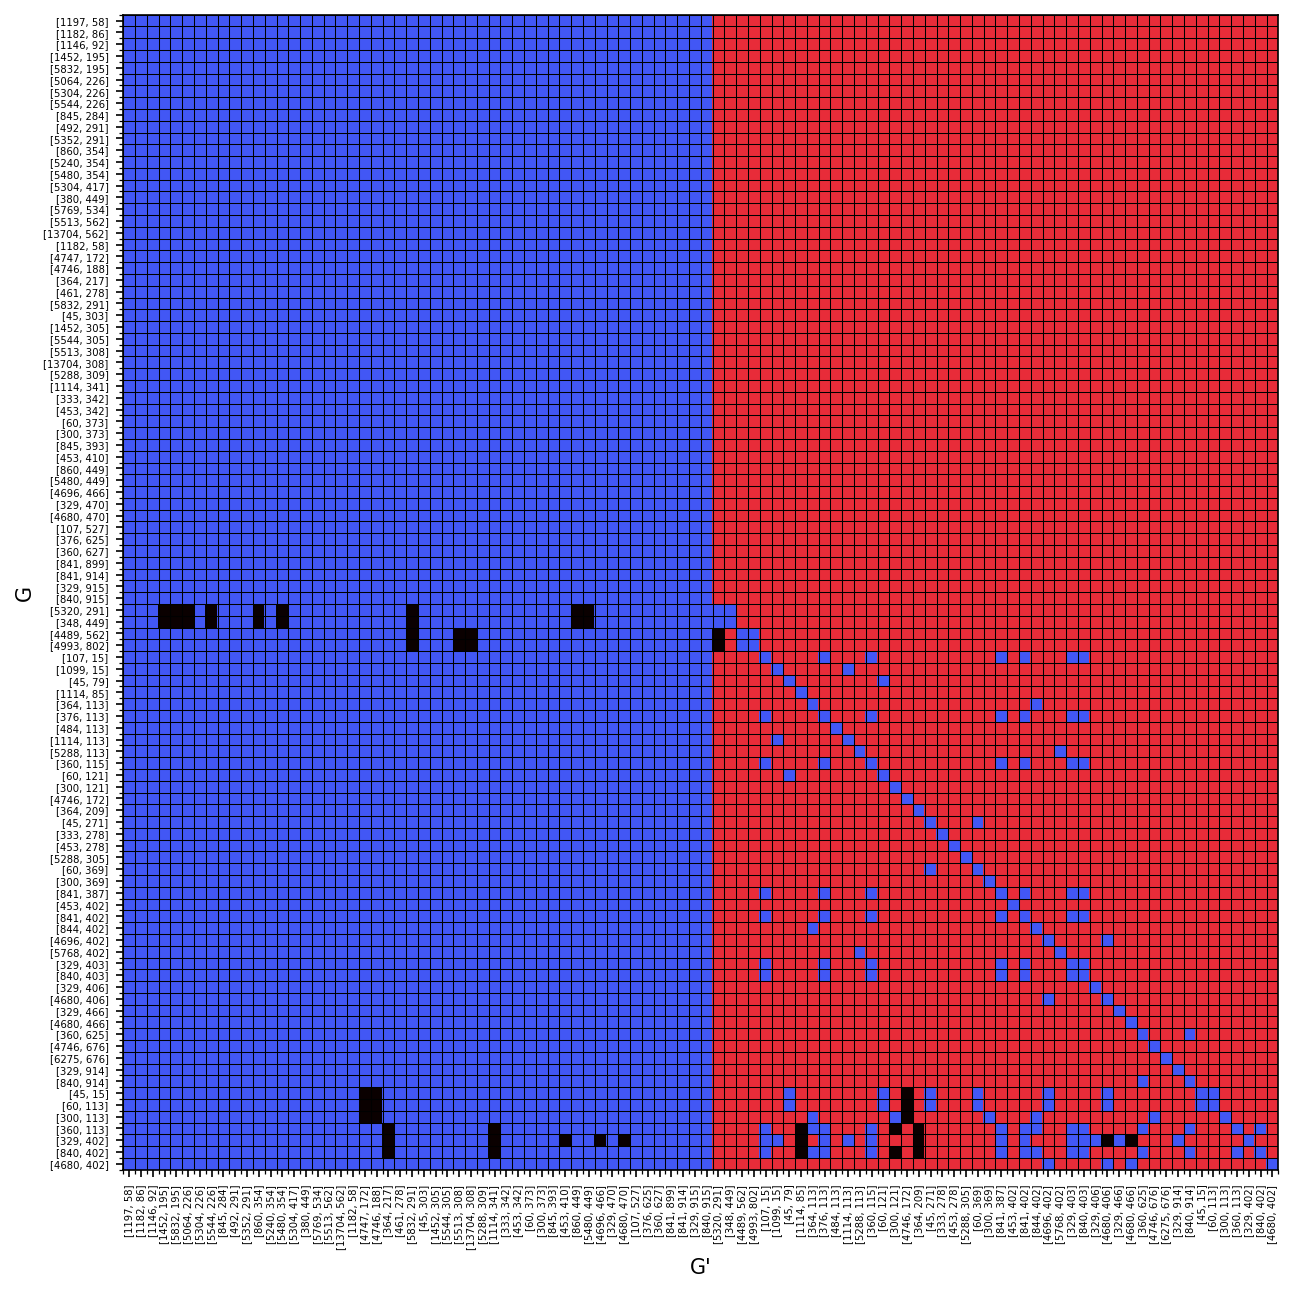

In [6]:
sorted_ids = [] 
sorted_ids += ten_edges_ids + nine_edges_ids + eight_edges_ids

print("Comparing all identifiable graphs...")
nodes = ["a", "b", "c", "d", "e"]
graph_list = []

for graph_id in sorted_ids:
    edges, omitted_nodes = id_to_edges(nodes, graph_id)
    graph = DMG(nodes, edges, omitted_nodes)
    graph_list.append(graph)

grid_numeric_total = compare_graphs(graph_list)
plot_grid(grid_numeric_total, sorted_ids, save=True)


In [8]:
cluster1 = [[8218, 678], [8248, 678], [8250, 550], [8250, 676], [8488, 678], [8504, 674], [8504, 676]]
cluster2 = [[33360, 434], [34320, 434], [34384, 306], [34384, 402], [42000, 434], [42512, 402], [42512, 418]] 
cluster3 = [[2369, 403], [2640, 403], [2880, 403], [2881, 387], [2881, 402], [2896, 401], [2896, 402]]

Graad9_1 = [[329, 914], [329, 406], [300, 369], [60, 369], [45, 271]]
Graad9_2 = [[4680, 466], [360, 625], [840, 914], [4680, 466], [360, 625]]

Graad11_1 = [[5288, 305]]
Graad11_2 = [[1114, 85]]
Graad11_3 = [[364, 209]]
Graad11_4 = [[4746, 172]]
Graad11_5 = [[453, 278]]
Graad11_6 = [[333, 278]]

Graad13_1 = [[4746, 676], [844, 402], [364, 113], [484, 113]]
Graad13_2 = [[6275, 676], [1114, 113], [1099, 15], [1114, 113]]
Graad13_3 = [[5288, 113], [768, 402]]


true_cluster_list = [cluster1, cluster2, cluster3]

TrueC = []
TrueC += cluster1 + cluster2 + cluster3

In [13]:
import math
n_permutations = math.factorial(5)
total_cluster_list = []
total_id_list = []

for cluster in true_cluster_list:
    graph_clusters = []
    graph_id_clusters = []
    
    for permutation in range(n_permutations):
        graph_clusters.append([])
        graph_id_clusters.append([])
    
    for graph_id in cluster:
        edges, omitted_nodes = id_to_edges(nodes, graph_id)     
        graph = DMG(nodes, edges, omitted_nodes, prime=(2**31 - 1))
        #graph = DMG(nodes, edges, omitted_nodes)
    
        permutations = permutate_graph(graph)
    
        for permutation_index, permutation in enumerate(permutations):
            permutation_id = graph_to_id(permutation)
            
            graph_clusters[permutation_index].append(permutation)
            graph_id_clusters[permutation_index].append(permutation_id)
            
    total_cluster_list += graph_clusters
    total_id_list += graph_id_clusters


for cluster_index, cluster in enumerate(total_id_list):
    for cluster_index2, cluster2 in enumerate(total_id_list):
        if cluster_index < cluster_index2:
            if all(elem in cluster for elem in cluster2):
                graph = total_cluster_list[cluster_index2]
                total_id_list.pop(cluster_index2)
                total_cluster_list.pop(cluster_index2)


In [11]:
nodes = ["a", "b", "c", "d", "e"]

test_set_1 = []
test_set_2 = []

for cluster in total_cluster_list:
    test_set_1.append(cluster[0])
    test_set_2.append(cluster[1])
    
CG1 = compare_graphs(test_set_1)
CG2 = compare_graphs(test_set_2)

print(np.all(CG1 == CG2))

100%|█████████████████████████████████████████| 300/300 [03:56<00:00,  1.27it/s]

True


In [12]:
eq_list = []
for p1_index in range(CG2.shape[0]):
    for p2_index in range(CG2.shape[0]):
        if p2_index > p1_index:
            if CG2[p1_index, p2_index] == 1:
                eq_list.append([p1_index, p2_index])


In [14]:
TP = 0
INC  = 0
FP = 0
TN = 0
FP_list = []
INC_list = []
FN_list = []

graph1_index = 0
for c1_id , c1 in enumerate(tqdm(total_cluster_list)):
    for graph1 in c1:
        graph2_index = 0
        
        for c2_id, c2 in enumerate(total_cluster_list):
            for graph2 in c2:
                if graph2_index >= graph1_index:
                    AE = algebraic_equivalence(graph1, graph2, method="EID_TSID")
                    if c1_id == c2_id or [c1_id, c2_id] in eq_list:
                        if AE == True:
                            TP += 1
                        else:
                            INC += 1
                            INC_list.append([graph1, graph2])

                    else:
                        if AE == True:
                            FP += 1
                            FP_list.append([graph1, graph2])
                        elif AE == "INC":
                            INC += 1
                            INC_list.append([graph1, graph2])
                        else:
                            TN += 1

                graph2_index += 1
                    
        graph1_index += 1

100%|███████████████████████████████████████| 300/300 [2:49:03<00:00, 33.81s/it]


In [15]:
print(TN)
print(TP)
print(INC)
print(FP)
print(1 - (FP + INC) / (TN + TP))


2168250
37800
0
0
1.0


In [7]:
print(15 / (2206035 + 15)) 

6.799483239273815e-06


In [4]:
nodes = ["a", "b", "c", "d", "e"]
G_id = [329, 402]
edges2, omitted_nodes2 = id_to_edges(nodes, G_id)
G = DMG(nodes, edges2, omitted_nodes2)

nodes = ["a", "b", "c", "d", "e"]
G_prime_id = [4680, 466]
edges1, omitted_nodes1 = id_to_edges(nodes, G_prime_id)
G_prime = DMG(nodes, edges1, omitted_nodes1)

MC = model_contained(G, G_prime, method="EID_TSID")

In [129]:
S = G.Sigma
L = G.Lambda
O = G.Omega
a, b, c, d, e = 0, 1, 2, 3, 4


1645341365
1645341365


(True, [['TSID', [[a, e, [a, b, d], [b, c]]]], ['EID', [[a, [d], [e]], [b, [c], [a]], [d, [b], [a]]]]])


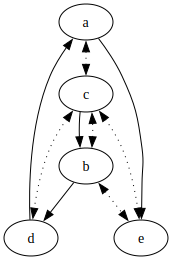

In [6]:
print(EID_TSID_identifiable(G_prime))
vizualize_graph(G_prime)

In [89]:
%%time

test_nodes = ["a", "b", "c"]

test_omitted_nodes = ["o1"]
i = 0
for i in range(100000000):
    i = i + 1
    
test_edges = [("o1", "b"), ("o1", "c"), ("b", "a"), ("c", "b")]
test_graph = DMG(test_nodes, test_edges, test_omitted_nodes, prime=11)
test_graph.generate_parameters()


[[9 3 1]
 [3 7 6]
 [1 6 8]]
[[6 2 3]
 [2 4 6]
 [3 6 7]]
[[5 9 1]
 [9 5 3]
 [1 3 9]]
[[7 1 7]
 [1 4 6]
 [7 6 3]]
[[2 3 0]
 [3 5 0]
 [0 0 2]]
[[ 1 10  6]
 [10  7  2]
 [ 6  2  8]]
[[9 3 8]
 [3 3 8]
 [8 8 2]]
[[ 2  0  5]
 [ 0  0 10]
 [ 5 10  9]]
2.18 s ± 105 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [107]:
%time

test_nodes = ["a", "b", "c"]
test_omitted_nodes = ["o1"]

for i in range(10000000000):
    pass
    
test_edges = [("o1", "b"), ("o1", "c"), ("b", "a"), ("c", "b")]
test_graph = DMG(test_nodes, test_edges, test_omitted_nodes, prime=11)
test_graph.generate_parameters()

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.15 μs


In [41]:
nodes = ["a", "b", "c", "d", "e"]

ID1 = [329, 914] #graad 5
ID2 = [329, 406]

edges1, o1 = id_to_edges(nodes, ID1)
edges2, o2 = id_to_edges(nodes, ID2)

graph1 = DMG(nodes, edges1, o1, prime=11)
graph2 = DMG(nodes, edges2, o2, prime=11)

graph1.generate_parameters()
graph2.generate_parameters()

print(graph1.Omega)
print(graph2.Omega)

n = 10000
INC = 0 
TC = 0
FC = 0

for i in tqdm(range(n)):
    AE = algebraic_equivalence(graph1, graph2, method="EID_TSID")
    if AE == "INC":
        INC += 1
    elif AE == True:
        TC += 1
    else:
        FC += 1



[[ 4  0  9  0  0]
 [ 0 10  5  0  0]
 [ 9  5 10  1  3]
 [ 0  0  1  9  3]
 [ 0  0  3  3  4]]
[[ 2  0  7  6  0]
 [ 0  7  3  0  0]
 [ 7  3 10  7  9]
 [ 6  0  7 10  0]
 [ 0  0  9  0 10]]


100%|████████████████████████████████████| 10000/10000 [00:41<00:00, 239.45it/s]


In [42]:
print(TC / n)
print(INC / n)
print(FC / n)

0.0188
0.2228
0.7584


In [58]:
print(25/121)
print((INC / n)*121)

0.2066115702479339
26.9588
